In [1]:
#All the libralies used in this project

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
diamonds_ds = pd.read_csv("diamonds.csv")
diamonds_ds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds_ds.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [8]:
diamonds_ds.shape

(53940, 11)

In [9]:
diamonds_ds.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


Text(0.5, 1.0, 'Distribution of Diamond Price')

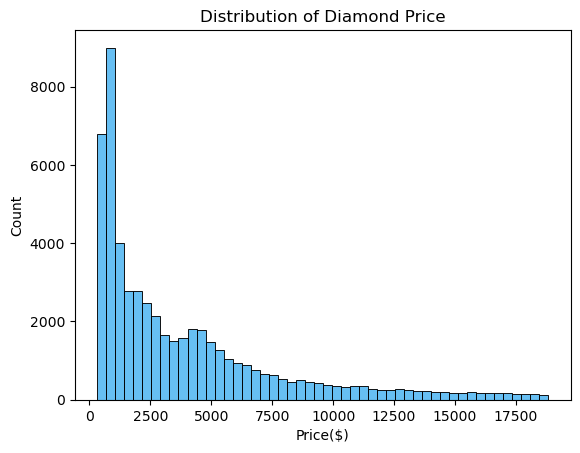

In [10]:
# Plotting a actual price distribution.
sns.histplot(diamonds_ds['price'], color='#34AAF0', bins=50)
plt.xlabel('Price($)')
plt.ylabel('Count')
plt.title('Distribution of Diamond Price')

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Diamond Cut')

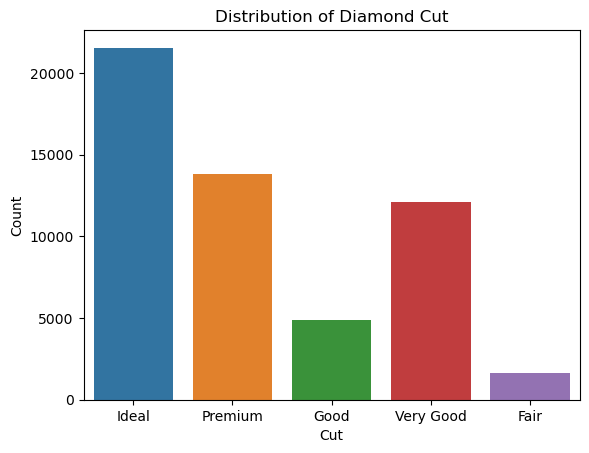

In [56]:
# Information related to various type of Diamond cut.
sns.countplot(diamonds_ds['cut'])
plt.xlabel('Cut')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')
plt.title('Distribution of Diamond Cut')

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of diamonds colors')

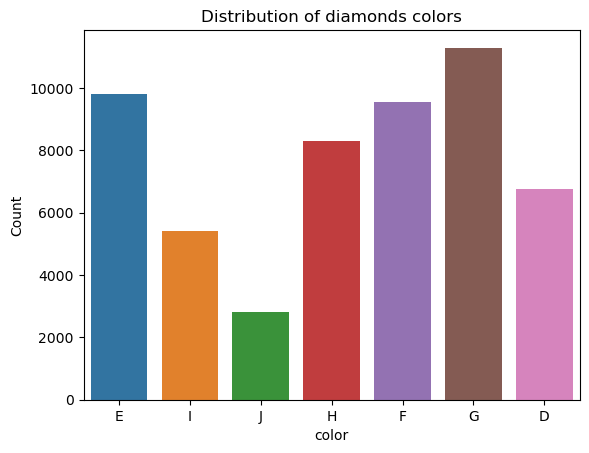

In [57]:
# Information related to various colors of diamonds.
sns.countplot(diamonds_ds['color'])
plt.xlabel('color')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')
plt.title('Distribution of diamonds colors')

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of clarities of diamonds')

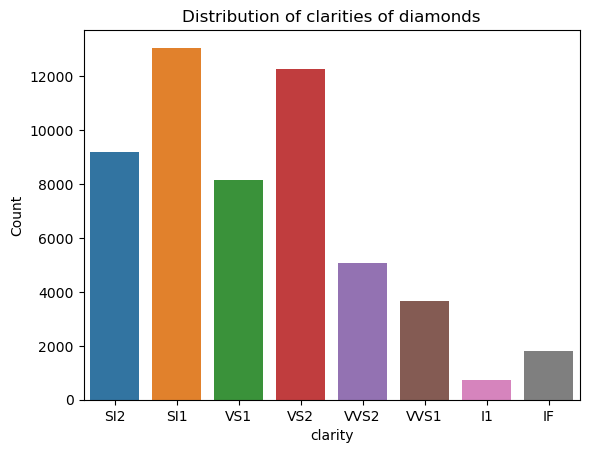

In [58]:
# Information related to various clarities of diamonds.
sns.countplot(diamonds_ds['clarity'])
plt.xlabel('clarity')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')
plt.title('Distribution of clarities of diamonds')

In [4]:
diamonds_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
diamonds_ds.corr()['price']

Unnamed: 0   -0.306873
carat         0.921591
depth        -0.010647
table         0.127134
price         1.000000
x             0.884435
y             0.865421
z             0.861249
Name: price, dtype: float64

In [6]:
#The first column is index and it remove from dataset
diamonds_ds = diamonds_ds.drop(["Unnamed: 0"], axis=1)
diamonds_ds.head(4)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


In [7]:
diamonds_ds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
duplicates = diamonds_ds.duplicated()
print(duplicates.sum())

146


In [9]:
diamonds_ds.drop_duplicates(inplace=True)

In [10]:
duplicates = diamonds_ds.duplicated()
print(duplicates.sum())

0


In [11]:
diamonds_ds.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
#Dropping dimentionless diamonds
diamonds_ds = diamonds_ds.drop(diamonds_ds[diamonds_ds["x"]==0].index)
diamonds_ds = diamonds_ds.drop(diamonds_ds[diamonds_ds["y"]==0].index)
diamonds_ds = diamonds_ds.drop(diamonds_ds[diamonds_ds["z"]==0].index)
diamonds_ds.shape

(53775, 10)

In [13]:
#Dropping the outliers. 
diamonds_ds = diamonds_ds[(diamonds_ds["depth"]<75)&(diamonds_ds["depth"]>45)]
diamonds_ds = diamonds_ds[(diamonds_ds["table"]<80)&(diamonds_ds["table"]>40)]
diamonds_ds = diamonds_ds[(diamonds_ds["x"]<30)]
diamonds_ds = diamonds_ds[(diamonds_ds["y"]<30)]
diamonds_ds = diamonds_ds[(diamonds_ds["z"]<30)&(diamonds_ds["z"]>2)]
diamonds_ds.shape

(53763, 10)

In [14]:
# Get list of categorical variables
s = (diamonds_ds.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [15]:
# Make copy to avoid changing original data 
lb_diamonds = diamonds_ds.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    lb_diamonds[col] = label_encoder.fit_transform(lb_diamonds[col])
lb_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [16]:
diamonds_ds.describe()

,carat,depth,table,price,x,y,z
count,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000
mean,0.797460,61.748781,57.457207,3930.785336,5.731405,5.733299,3.539367
std,0.473136,1.419309,2.226311,3985.807738,1.118563,1.110473,0.690879
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


In [17]:
# Assigning the featurs as X and trarget as y
X= lb_diamonds.drop(["price"],axis =1)
y= np.log(lb_diamonds["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [18]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

RandomForestRegressor() --> 0.9921379572792618


In [20]:
import pickle
with open('diamond_predictor.pickle', 'wb') as file:
    pickle.dump(rf, file)

In [22]:
pred_value = rf.predict([[0.29,3,5,5,62.4,58.0,4.20,4.23,2.63]])
pred_value

C:\Users\Vishwa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.92703068])

In [23]:
result = np.exp(pred_value)
print(result)

[375.03924582]


In [25]:
# Model prediction on test data
pred = rf.predict(X_test)

In [22]:
from sklearn import metrics
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9921296900308393
Adjusted R^2: 0.9921244162024034
MAE: 0.0636119468815612
MSE: 0.008127572372484213
RMSE: 0.09015304971260935


In [23]:
X_test.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [25]:
pred_value = rf.predict([[0.70,4,1,5,62.8,60.0,5.59,5.65,3.53]])
pred_value

C:\Users\Vishwa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.9185273])

In [26]:
result = np.exp(pred_value)
print(result)

[2747.72149681]


In [27]:
y_pred = rf.predict(X_test)

In [28]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.06 degrees.
Accuracy: 99.18 %.


In [68]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[1000],
              'criterion':['squared_error','absolute_error','poisson'],
              'max_samples':[0.5],
              'max_features':[0.75],
              'max_depth':[100]
             }

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

rf_model = grid_fit.best_estimator_

rf_model.score(X_test, y_test)

0.9814306052529703

C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Vishwa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


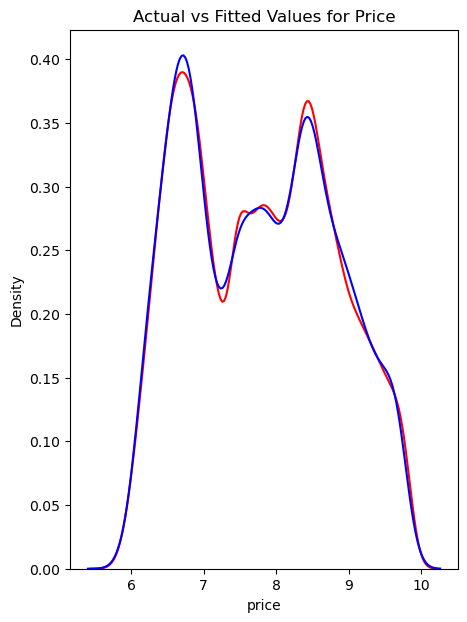

In [28]:
import seaborn as sn
plt.figure(figsize=(5, 7))

ax = sn.distplot(y, hist=False, color="r", label="Actual Value")
sn.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [30]:
# Evaluate the margin of error.
df_py = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred, 'Margin of error': y_test-y_pred})
df_py[0:15]

,Actual Price,Predicted Price,Margin of error
37950,6.914731,6.908515,0.006216
38600,6.945051,6.990098,-0.045047
16557,8.796944,8.905372,-0.108428
20025,6.042633,6.105027,-0.062394
1326,7.992945,8.004823,-0.011879
41270,6.218600,6.325234,-0.106634
53513,7.895808,7.827521,0.068287
24424,9.447545,9.495878,-0.048334
35319,6.799056,6.976196,-0.177140
28285,5.902633,6.038584,-0.135951
